<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 *Logistic Regression*

# Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

#  Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [111]:
# ANSWER
titanic_csv = '../DATA/titanic_train.csv'
df = pd.read_csv(titanic_csv)

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [114]:
df.index

RangeIndex(start=0, stop=891, step=1)

Why would we want to set an index column based on `PassengerId`?

>> Because the dataset is based on the details of Passengers and PensengerID is the unique identifier. 

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
## Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [115]:
# ANSWER
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
df.isnull().sum()     # Check which column has, and how many, NULL values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
df.isnull().sum().sum()

866

In [118]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

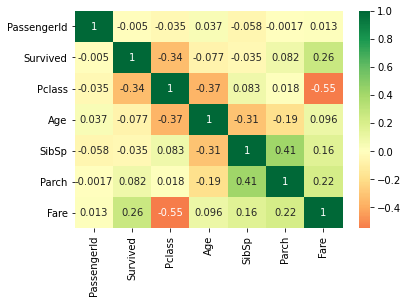

In [119]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [120]:
df['Survived'].corr(df['Pclass'])

-0.33848103596101503

# Numerical Predictors Only

## Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [121]:
# ANSWER
X = df[['Pclass', 'Parch']]
type(X)

pandas.core.frame.DataFrame

In [122]:
y = df['Survived']
type(y)

pandas.core.series.Series

## Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [123]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [124]:
# ANSWER
# Create Model
lr = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [125]:
# ANSWER
# Fit Model
lr.fit(X_train, y_train)

LogisticRegression()

In [126]:
# Score
lr.score(X_train, y_train)

0.6912751677852349

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [127]:
# ANSWER
lr.coef_

array([[-0.88528877,  0.37910902]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [128]:
# ANSWER
lr.intercept_

array([1.32709322])

We can create tuples of the predictor names and coefficients like this:

In [129]:
# zip = combines iterables (dictionary, array, etc)   REF https://www.programiz.com/python-programming/methods/built-in/zip
# This is to better present the lr.coef_

# ANSWER
print(set(zip(X.columns, lr.coef_[0])))

{('Pclass', -0.8852887719172413), ('Parch', 0.37910902283528275)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [130]:
for col in zip(X.columns, lr.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.885289
Parch       +0.379109


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [131]:
# ANSWER
y_pred = lr.predict(X_test)

In [132]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[143  31]
 [ 66  55]]


In [148]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


What is the  `accuracy_score` for the test data?

In [133]:
# ANSWER
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6711864406779661

What can we say aout this result?

ANSWER
- ...
- ...

## Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [134]:
# ANSWER
X = df[['Pclass', 'Parch', 'Age']]
y = df['Survived']

In [135]:
X

,Pclass,Parch,Age
0,3,0,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,0,35.0
...,...,...,...
886,2,0,27.0
887,1,0,19.0
888,3,2,NaN
889,1,0,26.0


In [136]:
# Clean Data     !! Age column has 177 NAN
X.isnull().sum()

Pclass      0
Parch       0
Age       177
dtype: int64

In [137]:
X['Age'].mean()     # Lets consider to replace NAN with X.mean()

29.69911764705882

In [138]:
X['Age'].fillna((X['Age'].mean()), inplace=True)     # Replace NAN with X.mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [139]:
X.isnull().sum()     # Confirm Update Done >> No more NAN

Pclass    0
Parch     0
Age       0
dtype: int64

In [140]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [141]:
# Build Model
lr = LogisticRegression()

In [142]:
# Fit Model
lr.fit(X_train, y_train)

LogisticRegression()

In [143]:
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)     # Earlier accuracy score is "0.6711864406779661"

0.6759776536312849

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [144]:
# ANSWER
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[92 18]
 [40 29]]


Nb. Here is how `confusion_matrix` arranges its output:

In [145]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ...

In [146]:
# False Positive is more prevalent, based on the percentage.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

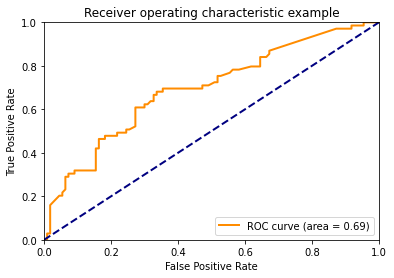

In [147]:
from sklearn import metrics

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = lr.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [ ]:
df

In [ ]:
df.info()
''' 
 0   PassengerId  891 non-null    int64     -> Not Required (This is just sequence) 
 1   Survived     891 non-null    int64     -> y  
 2   Pclass       891 non-null    int64     -> X  
 3   Name         891 non-null    object     -> Not Required (Name does not matter)  
 4   Sex          891 non-null    object     -> Please convert dummies
 5   Age          714 non-null    float64     -> X
 6   SibSp        891 non-null    int64     -> X_Ready
 7   Parch        891 non-null    int64     -> X  
 8   Ticket       891 non-null    object     -> Not Required (This is just sequence)  
 9   Fare         891 non-null    float64     -> X_Ready
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object     -> Please convert dummies
 '''

In [ ]:
df_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'])
df_dummies.head()

So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [ ]:
# ANSWER
# Set Feature Both Numerical, Categorical

X = df_dummies[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 
  'Pclass_1', 'Pclass_2', 'Pclass_3']]
y = df_dummies['Survived']

X['Age'].fillna((X['Age'].mean()), inplace=True)     # Replace NAN with X.mean()

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Build Model
lr = LogisticRegression()
# Fit
lr.fit(X_train, y_train)
# Predict
y_pred = lr.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Plot the ROC curve for the new model:

In [ ]:
# ANSWER
from sklearn import metrics
metrics.plot_roc_curve(lr, X_test, y_test) 
plt.show()

In [ ]:
# Another Method of ROC PLotting

preds = lr.predict_proba(X_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area=%0.2f)' %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower right')
plt.show()


Can we improve the model by including the remaining features?

In [ ]:
# ANSWER
The ROC Curve seems the same.

# Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [168]:
# Reset X and y

df_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'])

X = df_dummies[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 
  'Pclass_1', 'Pclass_2', 'Pclass_3']]
y = df_dummies['Survived']

X['Age'].fillna((X['Age'].mean()), inplace=True)     # Replace NAN with X.mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [169]:
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0,1,0,1,0
887,19.000000,0,0,30.0000,1,0,0,0,1,1,0,0
888,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [170]:
# Resplit Train/Test Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [171]:
# Rebuild Model -> Fit -> Predict
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
# Check Results (Confusion Matrix)
y_pred = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[91  9]
 [30 49]]


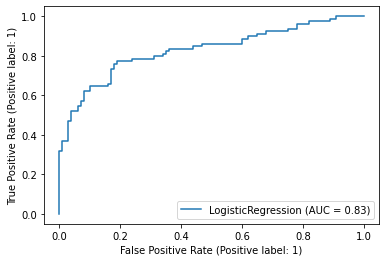

In [177]:
# Confusion Matrix -> ROC Curve
# Note the the Confusion Matrix is plotted based on different "threshold", resulting new TPR & FPR

from sklearn import metrics
metrics.plot_roc_curve(lr, X_test, y_test) 
plt.show()